**Qns 1**

In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
mainDIR = os.listdir('./CNN Practicum')
print(mainDIR)

['test', 'train', 'val']


In [3]:
train_folder= './CNN Practicum/train/'
val_folder = './CNN Practicum/val/'
test_folder = './CNN Practicum/test/'

In [5]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('../Pract_2/CNN Practicum/train/',
                                                 target_size = (64, 64),
                                                 color_mode = 'grayscale',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('../Pract_2/CNN Practicum/val/',
    target_size=(64, 64),  
    color_mode = 'grayscale',                                                  
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory('../Pract_2/CNN Practicum/test/',
                                            target_size = (64, 64),
                                            shuffle=False,
                                            color_mode = 'grayscale',
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


**Qns 2**

In [4]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 1)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'softmax', units = 2))


# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [7]:
cnn_model = cnn.fit(training_set,
        steps_per_epoch = len(training_set),
        epochs = 30,
        validation_data = validation_generator)

Epoch 1/30
17/17 [==============================] - 7s 393ms/step - loss: 0.7399 - accuracy: 0.5019 - val_loss: 0.6914 - val_accuracy: 0.5611
Epoch 2/30
17/17 [==============================] - 4s 223ms/step - loss: 0.6936 - accuracy: 0.4889 - val_loss: 0.6917 - val_accuracy: 0.5222
Epoch 3/30
17/17 [==============================] - 4s 214ms/step - loss: 0.6929 - accuracy: 0.5241 - val_loss: 0.6908 - val_accuracy: 0.5556
Epoch 4/30
17/17 [==============================] - 4s 214ms/step - loss: 0.6931 - accuracy: 0.5148 - val_loss: 0.6917 - val_accuracy: 0.5222
Epoch 5/30
17/17 [==============================] - 4s 220ms/step - loss: 0.6929 - accuracy: 0.4815 - val_loss: 0.6886 - val_accuracy: 0.5167
Epoch 6/30
17/17 [==============================] - 4s 215ms/step - loss: 0.6916 - accuracy: 0.4815 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 7/30
17/17 [==============================] - 4s 206ms/step - loss: 0.6918 - accuracy: 0.5093 - val_loss: 0.6985 - val_accuracy: 0.4722
Epoch 

In [8]:
test_accu = cnn.evaluate(test_set,steps=10)

10/10 [==============================] - 3s 336ms/step - loss: 0.1466 - accuracy: 0.9533


In [9]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 95.333331823349 %


In [10]:
Y_pred_test = cnn.predict(test_set)
y_pred_test = np.argmax(Y_pred_test, axis=1)

Y_pred = cnn.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

Y_pred_train = cnn.predict(training_set)
y_pred_train = np.argmax(Y_pred_train, axis=1)

Text(0.5, 1.0, 'Train - Accuracy')

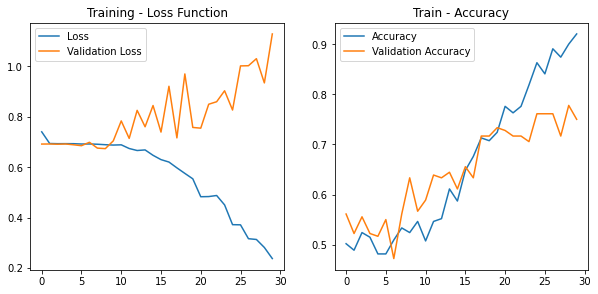

In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(cnn_model.history['loss'], label='Loss')
plt.plot(cnn_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(cnn_model.history['accuracy'], label='Accuracy')
plt.plot(cnn_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

**Qns 3**

In [12]:
print(classification_report(test_set.classes, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.97      0.93      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [13]:
cm=confusion_matrix(test_set.classes, y_pred_test)
cm

array([[146,   4],
       [ 10, 140]], dtype=int64)

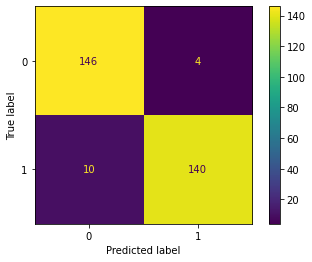

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()